### Four aspects of Central Limit Theorem
- `The sampling distribution of the mean will be less spread than the values in the population from which the sample is taken`
- `The sampling distribution will be well modeled by normal distribution`
- `The spread of the sampling distribution is related to the spread of the population values`
- `Bigger samples lead to smaller spread in the sampling distribution`

In [1]:
import csv
import os
import random
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [2]:
incomeData = []
folder_path = r"..\..\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline = '') as myFile:
    data = csv.reader(myFile)
    for row in data:
        if row[6] != 'INCTOT':
            if int(row[6]) > 1:
                if int(row[6]) != 9999999:
                    if int(row[1]) > 17:
                        incomeData.append(int(row[6]))
                        

In [3]:
## get sample
def getSample(population, sampleSize):
    sampleList = random.sample(population, sampleSize)
    return sampleList

## Sample Mean
def getMean(sampleList):
    sampleSize = len(sampleList)
    totalSumIncome = 0
    for row in sampleList:
        totalSumIncome = row + totalSumIncome
    mean = totalSumIncome / sampleSize
    return mean

## Skewness and Kurtosis
def getSkewAndKurtosis(sampleList):
    sampleSize = len(sampleList)
    
    # Mean again
    totalSumIncome = 0
    for row in sampleList:
        totalSumIncome = row + totalSumIncome
    mean = totalSumIncome / sampleSize
    
    
    # Variance
    sumOfSquares = 0
    s3 = 0
    s4 = 0
    for row in sampleList:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
        s3 = deviationScore**3 + s3
        s4 = deviationScore**4 + s4
    variance = sumOfSquares / (sampleSize - 1)
    
    
    # Standard deviation
    SD = variance**0.5
    
    ## Kurtosis
    n = sampleSize
    s2 = sumOfSquares
    m2 = s2/n
    m4 = s4/n
    sampleKurtosis = ((n*(n+1)) / ((n-1)*(n-2)*(n-3))) * ((n-1)**2)*(s4/(s2**2)) - 3
  
    ## Skew
    sampleSkew = s3/((n-1)*SD**3)
    
    return sampleSkew, sampleKurtosis  

In [4]:

x = 0
n = 50 # Sample Size
statsOfSamples = []
numOfSamples = 100
while x < numOfSamples:
    x += 1
    mySample = getSample(incomeData, n)
    mySampleMean = getMean(mySample)
    statsOfSamples.append(mySampleMean)

print('Size of Samples Array:  ', len(statsOfSamples), '\n\n')
popMean = getMean(incomeData)
meanOfMeans = getMean(statsOfSamples)

skew, kurtosis = getSkewAndKurtosis(statsOfSamples)
popSkew, popKurtosis = getSkewAndKurtosis(incomeData)
    
print('Population Mean: ', popMean)
print('Mean of means: ', meanOfMeans)
print('Skew: ', skew)
print('Population Skew: ', popSkew)
print('Kurtosis: ', kurtosis)
print('Population Kurtosis: ', popKurtosis)


Size of Samples Array:   100 


Population Mean:  47496.591260247595
Mean of means:  48609.754
Skew:  0.6338141067255936
Population Skew:  4.853885145255594
Kurtosis:  0.5930681791731374
Population Kurtosis:  35.86795035155139


As $n$ (sample size) increases, the $\bar{x}$ (sample mean) should get closer to $\mu$ (population mean)

$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$



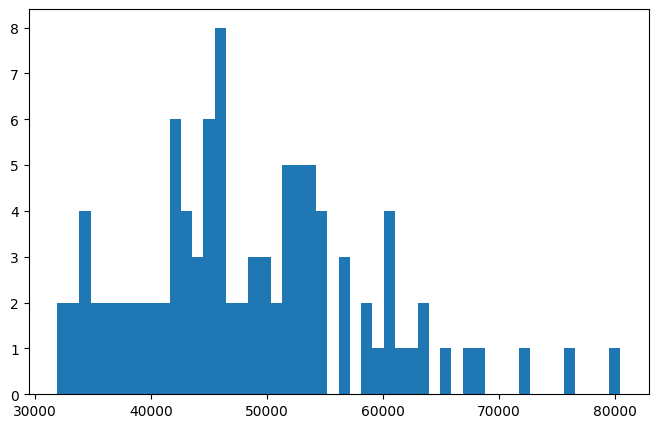

In [5]:
##
plt.figure(figsize = (8, 5))
plt.hist(statsOfSamples, bins = 50)
plt.show()

<Axes: ylabel='Count'>

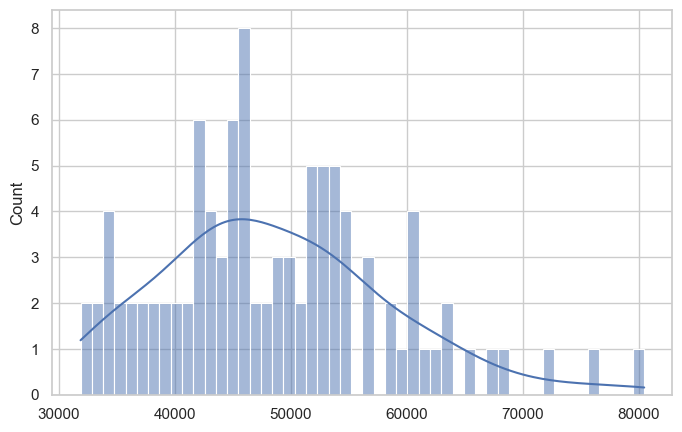

In [6]:
## Nice plot
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (8, 5))
sns.histplot(statsOfSamples, kde=True, bins=50, color="b")